<a href="https://colab.research.google.com/github/jordanboaz/sklearn_play/blob/main/Regressao_Salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/salario.xlsx')

In [ ]:
df.head()

,id,salbeg,time,age,edlevel
0,628,8400,81,28.50,16
1,630,24000,73,40.33,16
2,632,10200,83,31.08,15
3,633,8700,93,31.17,16
4,635,17400,83,41.92,19


É importante visualizar os tipos e a quantidade de dados que temos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       474 non-null    int64  
 1   salbeg   474 non-null    int64  
 2   time     474 non-null    int64  
 3   age      474 non-null    float64
 4   edlevel  474 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 18.6 KB


Também precisamos visualizar algumas informações estatísticas do nosso dataset

In [ ]:
df.describe()

,id,salbeg,time,age,edlevel
count,474.000000,474.000000,474.000000,474.000000,474.000000
mean,876.597046,6806.434599,81.109705,37.186139,13.491561
std,146.466774,3148.255262,10.060945,11.787242,2.884846
min,626.000000,3600.000000,63.000000,23.000000,8.000000
25%,748.250000,4995.000000,72.000000,28.500000,12.000000
50%,877.500000,6000.000000,81.000000,32.000000,12.000000
75%,1002.750000,6996.000000,90.000000,45.980000,15.000000
max,1129.000000,31992.000000,98.000000,64.500000,21.000000


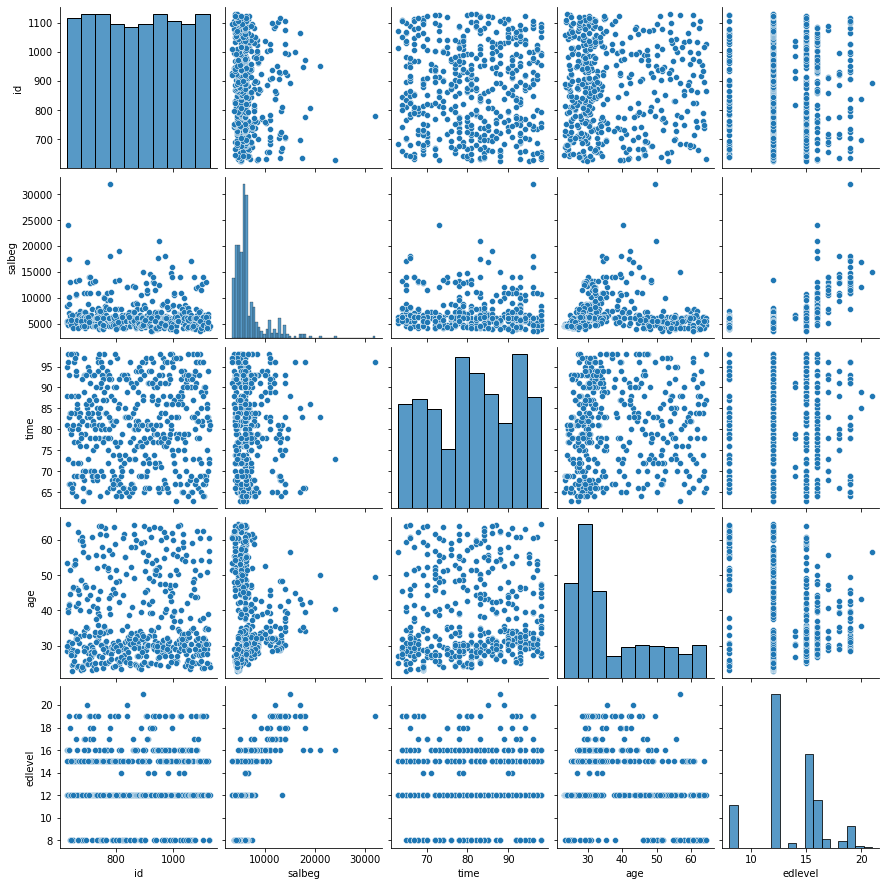

In [ ]:
sns.pairplot(df)

Seaborn nós permite visualizar alguns histogramas do dataset.

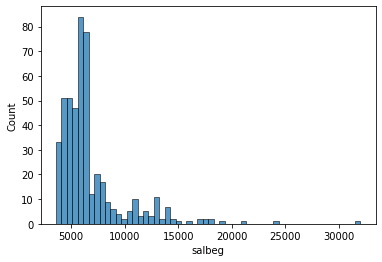

In [ ]:
sns.histplot(df['salbeg'])

Fica claro que é uma distribuição skwed para a direita. A média é maior que a media. 

# 1- Faça uma matrix de correlação.

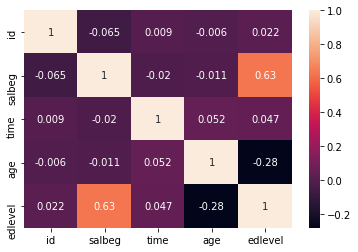

In [ ]:
sns.heatmap(df.corr(), annot=True)

A matrix de correlação nos mostra a corralação dois a dois de cada um dos dados.
É claramente visível que a variável 'salbeg' tem uma maior correlação positiva com a variãvel 'edlevel'. Podemos ver também uma correlação negativa entre 'salbeg' e 'age'

# 2- Faça um modelo de regressão linear somente com a variável que possui a maior correlação com o target

In [ ]:
X = df[['edlevel']] # Nossa feature será somente edlevel
y = df['salbeg'] #Esse é nosso target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) #Dividimos nossa base em 40% para teste e 60% para treino

In [ ]:
lm = LinearRegression() # Instanciar o modelo de regressão linear

In [ ]:
lm.fit(X_train, y_train) # A função fit realiza o treino

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Podemos ver o coeficiente do modelo em um dataframe. O coeficiente indica quando cada feature influencia no resultado final. Nesse modelo, cada unidade de edlevel aumenta o valor de salbeg em 621

In [ ]:
edlevelCoef = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
edlevelCoef

,Coef
edlevel,621.928059


# 3- Faça um modelo de regressão com todas a variáveis. Explique porque os parâmetros do modelo sofreram alteração.

In [ ]:
df.columns

Index(['id', 'salbeg', 'time', 'age', 'edlevel'], dtype='object')

In [ ]:
X2 = df[['time', 'age', 'edlevel']] 
y2 = df['salbeg'] 

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4) #Dividimos nossa base em 40% para teste e 60% para treino

In [ ]:
lm2 = LinearRegression() 

In [ ]:
lm2.fit(X_train2, y_train2)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coef = pd.DataFrame(lm2.coef_, X2.columns, columns=['Coef'])
coef

,Coef
time,-22.627804
age,35.115458
edlevel,725.711998


Esse são os coeficientes do modelo usando todas as features. Existe uma mudança pois o modelo tentou utilizar mais váriaveis para encaixar melhor a linha de regressão.

# 4- Escreva a fórmula do último modelo

#### salbeg = 725.71*edlevel + 35.11*age -22.62*time